Première phase de découverte du dataset + cleaning et choix des colonnes utiles

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
full_data = pd.read_csv("../Speed Dating Data.csv", encoding="ISO-8859-1")
full_data.head()

iid   id  gender  idg  condtn  wave  round  position  positin1  order  \
0    1  1.0       0    1       1     1     10         7       NaN      4   
1    1  1.0       0    1       1     1     10         7       NaN      3   
2    1  1.0       0    1       1     1     10         7       NaN     10   
3    1  1.0       0    1       1     1     10         7       NaN      5   
4    1  1.0       0    1       1     1     10         7       NaN      7   

   partner   pid  match  int_corr  samerace  age_o  race_o  pf_o_att  \
0        1  11.0      0      0.14         0   27.0     2.0      35.0   
1        2  12.0      0      0.54         0   22.0     2.0      60.0   
2        3  13.0      1      0.16         1   22.0     4.0      19.0   
3        4  14.0      1      0.61         0   23.0     2.0      30.0   
4        5  15.0      1      0.21         0   24.0     3.0      30.0   

   pf_o_sin  pf_o_int  pf_o_fun  pf_o_amb  pf_o_sha  dec_o  attr_o  sinc_o  \
0      20.0      20.0      20.0       0.0       5.0      0     6.0     8.0   
1       0.0       0.0      40.0       0.0       0.0      0     7.0     8.0   
2      18.0      19.0      18.0      14.0      12.0      1    10.0    10.0   
3       5.0      15.0      40.0       5.0       5.0      1     7.0     8.0   
4      10.0      20.0      10.0      10.0      20.0      1     8.0     7.0   

   intel_o  fun_o  amb_o  shar_o  like_o  prob_o  met_o   age field  field_cd  \
0      8.0    8.0    8.0     6.0     7.0     4.0    2.0  21.0   Law       1.0   
1     10.0    7.0    7.0     5.0     8.0     4.0    2.0  21.0   Law       1.0   
2     10.0   10.0   10.0    10.0    10.0    10.0    1.0  21.0   Law       1.0   
3      9.0    8.0    9.0     8.0     7.0     7.0    2.0  21.0   Law       1.0   
4      9.0    6.0    9.0     7.0     8.0     6.0    2.0  21.0   Law       1.0   

  undergra mn_sat tuition  race  imprace  imprelig     from zipcode  \
0      NaN    NaN     NaN   4.0      2.0       4.0  Chicago  60,521   
1      NaN    NaN     NaN   4.0      2.0       4.0  Chicago  60,521   
2      NaN    NaN     NaN   4.0      2.0       4.0  Chicago  60,521   
3      NaN    NaN     NaN   4.0      2.0       4.0  Chicago  60,521   
4      NaN    NaN     NaN   4.0      2.0       4.0  Chicago  60,521   

      income  goal  date  go_out  career  career_c  sports  tvsports  \
0  69,487.00   2.0   7.0     1.0  lawyer       NaN     9.0       2.0   
1  69,487.00   2.0   7.0     1.0  lawyer       NaN     9.0       2.0   
2  69,487.00   2.0   7.0     1.0  lawyer       NaN     9.0       2.0   
3  69,487.00   2.0   7.0     1.0  lawyer       NaN     9.0       2.0   
4  69,487.00   2.0   7.0     1.0  lawyer       NaN     9.0       2.0   

   exercise  dining  museums  art  hiking  gaming  clubbing  reading   tv  \
0       8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   
1       8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   
2       8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   
3       8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   
4       8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   

   theater  movies  concerts  music  shopping  yoga  exphappy  expnum  \
0      1.0    10.0      10.0    9.0       8.0   1.0       3.0     2.0   
1      1.0    10.0      10.0    9.0       8.0   1.0       3.0     2.0   
2      1.0    10.0      10.0    9.0       8.0   1.0       3.0     2.0   
3      1.0    10.0      10.0    9.0       8.0   1.0       3.0     2.0   
4      1.0    10.0      10.0    9.0       8.0   1.0       3.0     2.0   

   attr1_1  sinc1_1  intel1_1  fun1_1  amb1_1  shar1_1  attr4_1  sinc4_1  \
0     15.0     20.0      20.0    15.0    15.0     15.0      NaN      NaN   
1     15.0     20.0      20.0    15.0    15.0     15.0      NaN      NaN   
2     15.0     20.0      20.0    15.0    15.0     15.0      NaN      NaN   
3     15.0     20.0      20.0    15.0    15.0     15.0      NaN      NaN   
4     15.0     

In [19]:
import re
columns = []
with open("../variables.txt", "r") as f_open:
    for line in f_open:
        if re.search(r"([a-zA-Z_]+):", line) is not None:
            element = re.search(r"([a-zA-Z_]+):", line).group(1)
            columns += [element]
print(columns)
c = '''
tvsports  
exercise  
dining  
museums  
art  
hiking  
gaming  
clubbing  
reading  
tv  
theater  
movies  
concerts  
music  
shopping  
yoga
'''
l = [el.strip() for el in c.split('\n')]
print(l)

['gender', 'age', 'age_o', 'd_age', 'race', 'race_o', 'samerace', 'importance_same_race', 'importance_same_religion', 'field', 'pref_o_attractive', 'pref_o_sinsere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o', 'sincere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important', 'attractive', 'sincere', 'intelligence', 'funny', 'ambition', 'attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 'ambition_partner', 'shared_interests_partner', 'sports', 'interests_correlate', 'expected_happy_with_sd_people', 'expected_num_interested_in_me', 'expected_num_matches', 'like', 'guess_prob_liked', 'met', 'decision', 'decision_o', 'match']
['', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies',

In [26]:
pd.DataFrame(full_data.isnull().sum(), columns= ['nan_count'])
#full_data.isnull().sum()

nan_count
iid               0
id                1
gender            0
idg               0
condtn            0
wave              0
round             0
position          0
positin1       1846
order             0
partner           0
pid              10
match             0
int_corr        158
samerace          0
age_o           104
race_o           73
pf_o_att         89
pf_o_sin         89
pf_o_int         89
pf_o_fun         98
pf_o_amb        107
pf_o_sha        129
dec_o             0
attr_o          212
sinc_o          287
intel_o         306
fun_o           360
amb_o           722
shar_o         1076
like_o          250
prob_o          318
met_o           385
age              95
field            63
field_cd         82
undergra       3464
mn_sat         5245
tuition        4795
race             63
imprace          79
imprelig         79
from             79
zipcode        1064
income         4099
goal             79
date             97
go_out           79
career           89
career_c        138
sports           79
tvsports         79
exercise         79
dining           79
museums          79
art              79
hiking           79
gaming           79
clubbing         79
reading          79
tv               79
theater          79
movies           79
concerts         79
music            79
shopping         79
yoga             79
exphappy        101
expnum         6578
attr1_1          79
sinc1_1          79
intel1_1         79
fun1_1           89
amb1_1           99
shar1_1         121
attr4_1        1889
sinc4_1        1889
intel4_1       1889
fun4_1         1889
amb4_1         1889
shar4_1        1911
attr2_1          79
sinc2_1          79
intel2_1         79
fun2_1           79
amb2_1           89
shar2_1          89
attr3_1         105
sinc3_1         105
fun3_1          105
intel3_1        105
amb3_1          105
attr5_1        3472
sinc5_1        3472
intel5_1       3472
fun5_1         3472
amb5_1         3472
dec               0
attr            202
sinc            277
intel           296
fun             350
amb             712
shar           1067
like            240
prob            309
met             375
match_es       1173
attr1_s        4282
sinc1_s        4282
intel1_s       4282
fun1_s         4282
amb1_s         4282
shar1_s        4282
attr3_s        4378
sinc3_s        4378
intel3_s       4378
fun3_s         4378
amb3_s         4378
satis_2         915
length          915
numdat_2        945
attr7_2        6394
sinc7_2        6423
intel7_2       6394
fun7_2         6394
amb7_2         6423
shar7_2        6404
attr1_2         933
sinc1_2         915
intel1_2        915
fun1_2          915
amb1_2          915
shar1_2         915
attr4_2        2603
sinc4_2        2603
intel4_2       2603
fun4_2         2603
amb4_2         2603
shar4_2        2603
attr2_2        2603
sinc2_2        2603
intel2_2       2603
fun2_2         2603
amb2_2         2603
shar2_2        2603
attr3_2         915
sinc3_2         915
intel3_2        915
fun3_2          915
amb3_2          915
attr5_2        4001
sinc5_2        4001
intel5_2       4001
fun5_2         4001
amb5_2         4001
you_call       4404
them_cal       4404
date_3         4404
numdat_3       6882
num_in_3       7710
attr1_3        4404
sinc1_3        4404
intel1_3       4404
fun1_3         4404
amb1_3         4404
shar1_3        4404
attr7_3        6362
sinc7_3        6362
intel7_3       6362
fun7_3         6362
amb7_3         6362
shar7_3        6362
attr4_3        5419
sinc4_3        5419
intel4_3       5419
fun4_3         5419
amb4_3         5419
shar4_3        5419
attr2_3        5419
sinc2_3        5419
intel2_3       5419
fun2_3         5419
amb2_3         5419
shar2_3        6362
attr3_3        4404
sinc3_3        4404
intel3_3       4404
fun3_3         4404
amb3_3         4404
attr5_3        6362
sinc5_3        6362
intel5_3       6362
fun5_3         6362
amb5_3         6362

In [28]:
# Séléction colonnes
dataset = full_data[['iid', 'pid', 'partner','gender', 'age', 'age_o', 'race', 'race_o', 'attr_o', 'samerace', 'imprace', 'imprelig', 'match', 'int_corr', 'field', 'field_cd', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met']]
dataset.columns

Index(['iid', 'pid', 'partner', 'gender', 'age', 'age_o', 'race', 'race_o',
       'attr_o', 'samerace', 'imprace', 'imprelig', 'match', 'int_corr',
       'field', 'field_cd', 'from', 'zipcode', 'income', 'goal', 'date',
       'go_out', 'career', 'career_c', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
       'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1',
       'amb1_1', 'shar1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1',
       'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1',
       'amb3_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
       'met'],
      dtype='object')

In [31]:
dataset.isnull().sum()

iid            0
pid           10
partner        0
gender         0
age           95
age_o        104
race          63
race_o        73
attr_o       212
samerace       0
imprace       79
imprelig      79
match          0
int_corr     158
field         63
field_cd      82
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      79
reading       79
tv            79
theater       79
movies        79
concerts      79
music         79
shopping      79
yoga          79
exphappy     101
expnum      6578
attr1_1       79
sinc1_1       79
intel1_1      79
fun1_1        89
amb1_1        99
shar1_1      121
attr2_1       79
sinc2_1       79
intel2_1      79
fun2_1        79
amb2_1        89
shar2_1       89
attr3_1      105
sinc3_1      105
intel3_1     105
fun3_1       105
amb3_1       1

In [36]:
dataset = dataset.drop(['income', 'expnum'], axis=1)
dataset.isnull().sum()

iid            0
pid           10
partner        0
gender         0
age           95
age_o        104
race          63
race_o        73
attr_o       212
samerace       0
imprace       79
imprelig      79
match          0
int_corr     158
field         63
field_cd      82
from          79
zipcode     1064
goal          79
date          97
go_out        79
career        89
career_c     138
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      79
reading       79
tv            79
theater       79
movies        79
concerts      79
music         79
shopping      79
yoga          79
exphappy     101
attr1_1       79
sinc1_1       79
intel1_1      79
fun1_1        89
amb1_1        99
shar1_1      121
attr2_1       79
sinc2_1       79
intel2_1      79
fun2_1        79
amb2_1        89
shar2_1       89
attr3_1      105
sinc3_1      105
intel3_1     105
fun3_1       105
amb3_1       105
attr         202
sinc         2

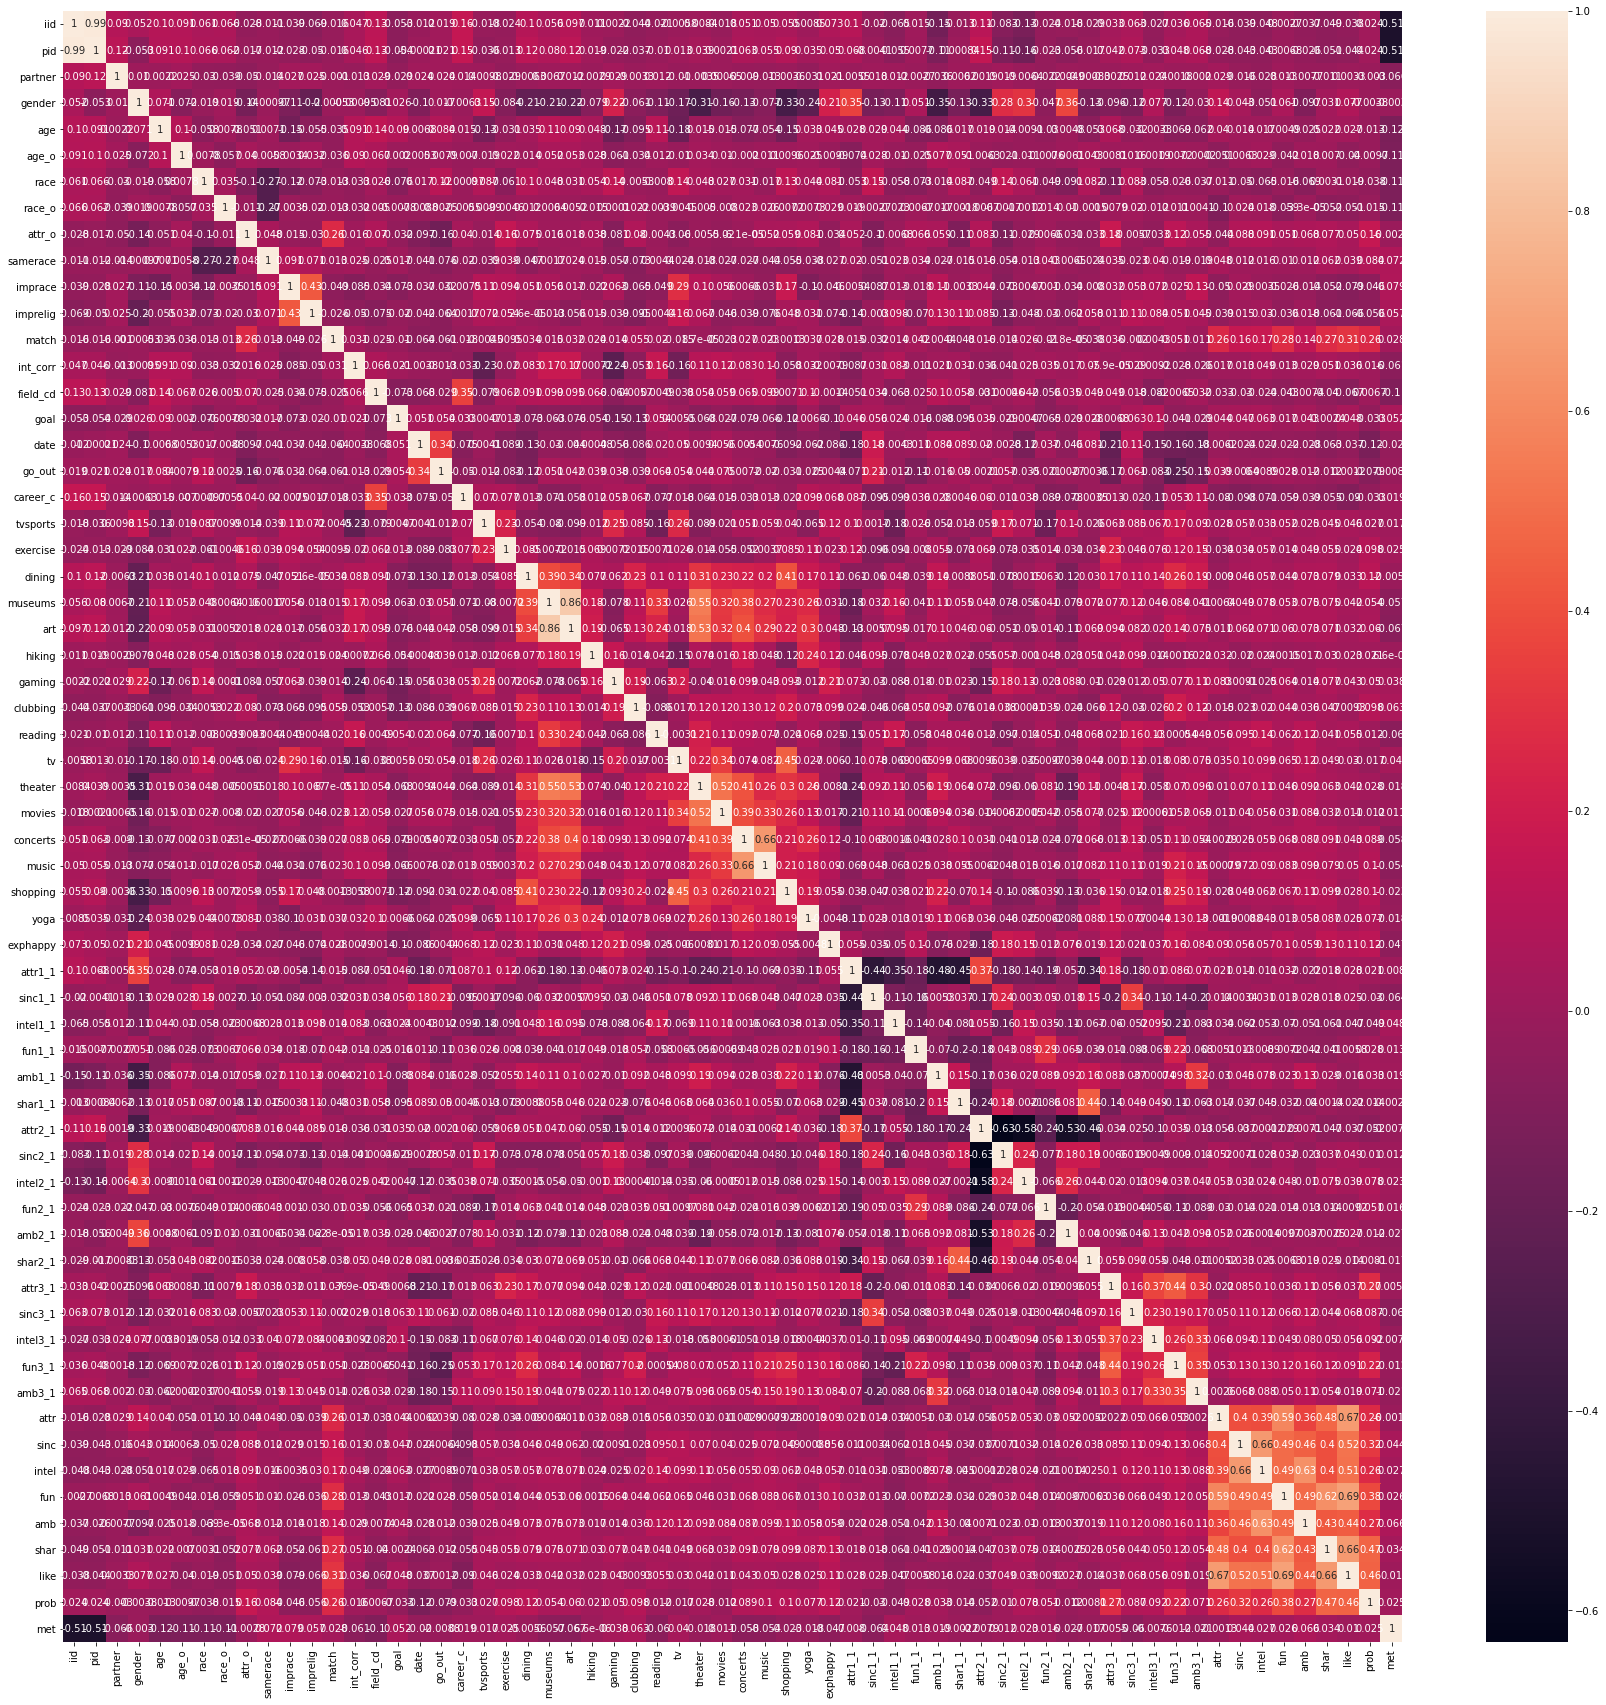

In [37]:
corr = dataset.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True)

In [39]:
corr.match[abs(corr.match)>0.1]

attr_o    0.260837
match     1.000000
attr      0.260676
sinc      0.164449
intel     0.169532
fun       0.277545
amb       0.140042
shar      0.270679
like      0.305723
prob      0.255531
Name: match, dtype: float64